# EDA

* ip: ip address of click.


* app: app id for marketing.


* device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)

* os: os version id of user mobile phone

* channel: channel id of mobile ad publisher

* click_time: timestamp of click (UTC)

* attributed_time: if user download the app for after clicking an ad, this is the time of the app download

* is_attributed: the target that is to be predicted, indic

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/sample.csv')

In [3]:
one = df[df['is_attributed']==1]
zero = df[df['is_attributed']==0].sample(len(one))

df = pd.concat([one,zero])    

In [6]:
df

,Unnamed: 0,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,1856384,85636,2,1,16,219,2017-11-09 05:09:46,2017-11-09 05:43:10,1
5,1884696,318386,96,311,24,213,2017-11-09 05:47:50,2017-11-09 08:56:18,1
6,556621,87874,19,0,38,210,2017-11-07 11:00:25,2017-11-07 15:40:32,1
10,1346631,249047,19,0,0,213,2017-11-08 11:53:06,2017-11-08 11:54:17,1
11,2152694,326680,10,1,7,113,2017-11-09 12:22:08,2017-11-09 12:22:30,1
...,...,...,...,...,...,...,...,...,...
52766,1376371,75670,18,1,2,107,2017-11-08 12:34:04,NaN,0
17427,2279696,34486,15,1,3,245,2017-11-09 15:22:02,NaN,0
31690,630706,144735,12,1,3,409,2017-11-07 12:52:06,NaN,0
23443,1806602,26666,11,1,22,137,2017-11-09 04:09:43,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300561 entries, 0 to 2300560
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ip               int64 
 1   app              int64 
 2   device           int64 
 3   os               int64 
 4   channel          int64 
 5   click_time       object
 6   attributed_time  object
 7   is_attributed    int64 
dtypes: int64(6), object(2)
memory usage: 140.4+ MB


In [ ]:
df.isna().sum()

ip                       0
app                      0
device                   0
os                       0
channel                  0
click_time               0
attributed_time    1843715
is_attributed            0
dtype: int64

visual

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


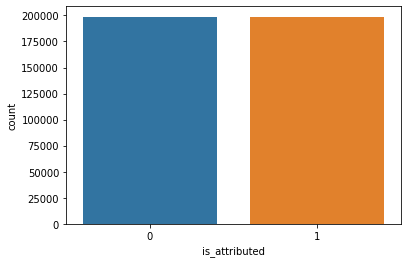

In [ ]:
sns.countplot(df['is_attributed'])

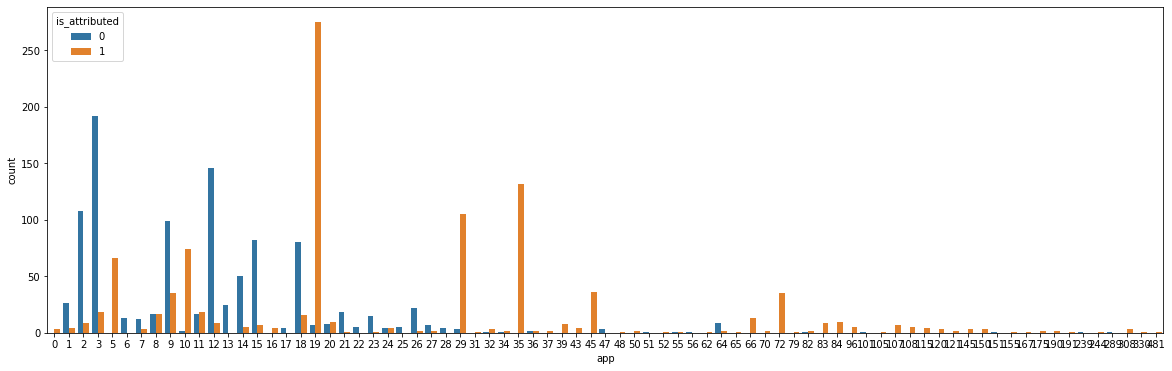

In [ ]:
mm = df.sample(2000)
plt.rcParams["figure.figsize"] = (20,6)
# sns.countplot(x=mm['channel'],hue=mm['is_attributed'])
# sns.countplot(x=mm['os'],hue=mm['is_attributed'])
# sns.countplot(x=mm['device'],hue=mm['is_attributed'])

# sns.countplot(x=mm['ip'],hue=mm['is_attributed'])
sns.countplot(x=mm['app'],hue=mm['is_attributed'])



In [ ]:
date = pd.to_datetime(df['click_time'], format='%Y%m%d %H:%M:%S')

In [ ]:
hour = date.apply(lambda x: x.hour)
df['h'] = hour

In [ ]:
year = date.apply(lambda x: x.year)
# df['h'] = hour

In [ ]:
mounth = date.apply(lambda x: x.month)
df['m'] = mounth

In [ ]:
year.value_counts()

2017    397326
Name: click_time, dtype: int64

In [ ]:
mounth.value_counts()

11    397326
Name: click_time, dtype: int64

Text(0.5, 0, 'hour of day')

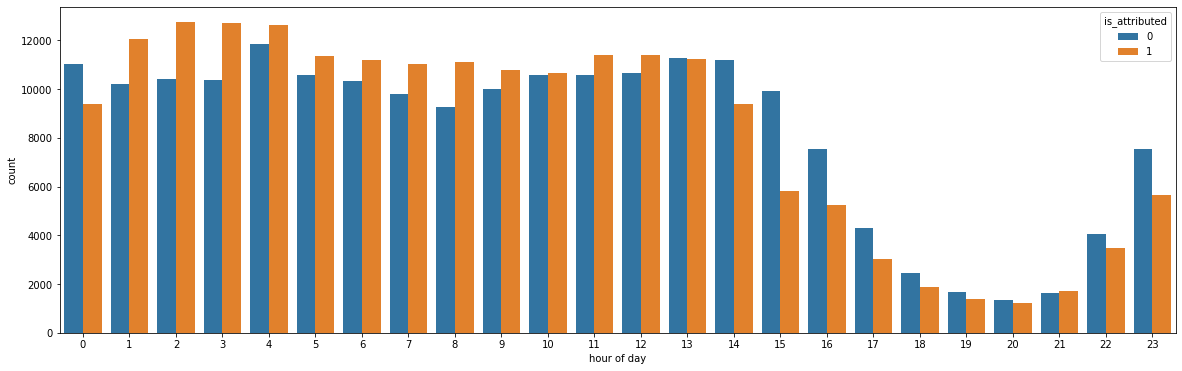

In [ ]:
# v = hours.values_count()
sns.countplot(x=df['h'],hue=df['is_attributed'])
plt.xlabel('hour of day')

Text(0.5, 0, 'day of week')

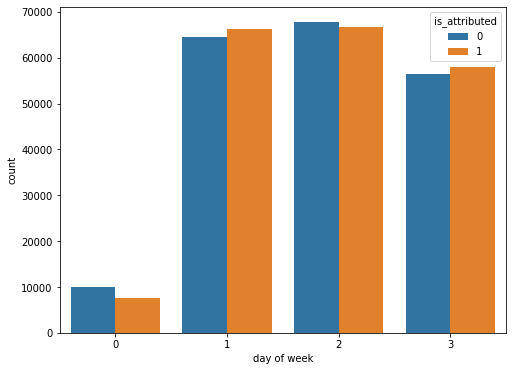

In [ ]:
df['d'] = date.apply(lambda x: x.dayofweek)
plt.rcParams["figure.figsize"] = (8,6)
# plt.rcParams["figure.figsize"] = (20,6)

sns.countplot(x=df['d'],hue=df['is_attributed'])
plt.xlabel('day of week')

In [ ]:
print(min(df['click_time']), max(df['click_time']))

2017-11-06 15:13:23 2017-11-09 16:00:00


In [ ]:
df['app'].value_counts()

3      349269
12     244537
2      222291
9      183312
18     165412
        ...  
235         1
392         1
385         1
384         1
360         1
Name: app, Length: 389, dtype: int64

In [ ]:
df['ip'].value_counts()

5348      14804
5314      13834
73516      8721
73487      8623
53454      5086
          ...  
255071        1
257118        1
259165        1
261212        1
8196          1
Name: ip, Length: 260238, dtype: int64